<a href="https://colab.research.google.com/github/lustraka/Data_Analysis_Workouts/blob/main/Communicate_Data_Findings/SandBox/SandBox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This will cause the need of restart
! pip install -U matplotlib

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import matplotlib
matplotlib.__version__

'3.4.3'

# Anscombe's quartet
[wiki](https://en.wikipedia.org/wiki/Anscombe%27s_quartet)

In [3]:
path = 'https://github.com/lustraka/Data_Analysis_Workouts/blob/main/Communicate_Data_Findings/SandBox/anscombes-quartet.xlsx?raw=true'
df = pd.read_excel(path, engine='openpyxl').dropna()
df

,X,Y,X.1,Y.1,X.2,Y.2,X.3,Y.3
0,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
1,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
2,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
3,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
4,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
5,14.0,9.96,14.0,8.1,14.0,8.84,8.0,7.04
6,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
7,4.0,4.26,4.0,3.1,4.0,5.39,19.0,12.50
8,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56
9,7.0,4.82,7.0,7.26,7.0,6.42,8.0,7.91


In [4]:
df.describe().round(2)

,X,Y,X.1,X.2,Y.2,X.3,Y.3
count,11.00,11.00,11.00,11.00,11.00,11.00,11.00
mean,9.00,7.50,9.00,9.00,7.50,9.00,7.50
std,3.32,2.03,3.32,3.32,2.03,3.32,2.03
min,4.00,4.26,4.00,4.00,5.39,8.00,5.25
25%,6.50,6.32,6.50,6.50,6.25,8.00,6.17
50%,9.00,7.58,9.00,9.00,7.11,8.00,7.04
75%,11.50,8.57,11.50,11.50,7.98,8.00,8.19
max,14.00,10.84,14.00,14.00,12.74,19.00,12.50


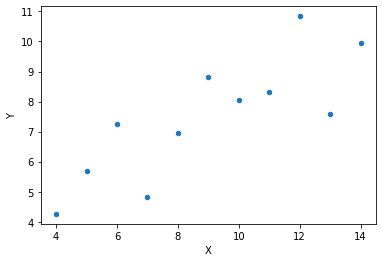

In [5]:
df.plot(kind='scatter', x='X', y='Y');

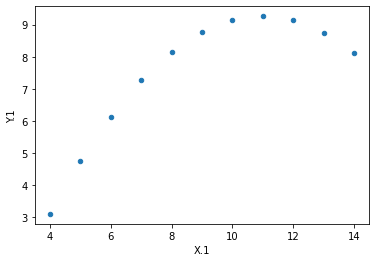

In [6]:
df.plot(kind='scatter', x='X.1', y='Y.1');

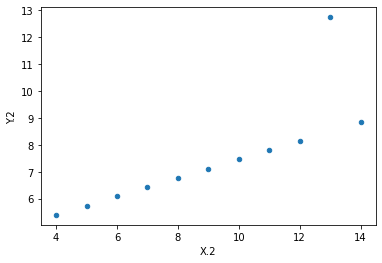

In [7]:
df.plot(kind='scatter', x='X.2', y='Y.2');

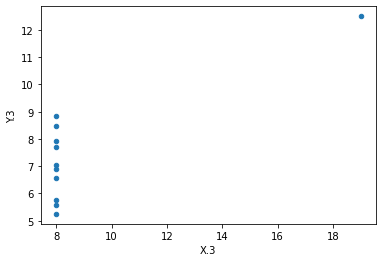

In [8]:
df.plot(kind='scatter', x='X.3', y='Y.3');

# Standard Deviation ([wiki](https://en.wikipedia.org/wiki/Standard_deviation))

Let $\mu$ be the expected value (the average) of random variable $X$ : 
$$\mu \equiv \text{E}[X].$$
The calculation of the sum of squared deviations can be related to moments calculated directly from the data.
$$\sigma(X) = \sqrt{\text{E}[(X - \text{E}[X])^2]} = \sqrt{\text{E}[X^2]-(\text{E}[X])^2}$$
The standard deviation is equal to the square root of the difference between the average of the squares of the values and the square of the avergage value.

Example:


In [9]:
X = np.array([2,4,4,4,5,5,7,9])
X.mean(), X.var(), X.std()

(5.0, 4.0, 2.0)

In [10]:
(X**2).sum()/len(X) - X.mean()**2

4.0

### Standard Devation of the Mean
$$\sigma_{mean} = \frac{\sigma}{\sqrt{N}}$$
Proof (assuming statistical independence of observations):
$$\text{Var(mean)} = \text{Var}(\frac{1}{N}\sum_{i=1}^NX_i) =\frac{1}{N^2}\text{Var}(\sum_{i=1}^NX_i) =\frac{1}{N^2}\sum_{i=1}^N\text{Var}(X_i) =\frac{N}{N^2}\text{Var}(X) =\frac{\text{Var}(X)}{N}$$

Correspondence of numpy and math:

| Python / Math |
|--- | 
|X - X.mean()|
|$\{(x_i-\bar{x})\}_{i=1}^N $|
|np.power(X - X.mean(), 2)|
|$\{(x_i-\bar{x})^2\}_{i=1}^N = \{\text{Var}(x_i)\}_{i=1}^N$|
|np.power(X - X.mean(), 2).sum() == len(X) * X.var()|
|$\sum_{i=1}^N\text{Var}(x_i) = N*\text{var}(X)$|

In [11]:
print(X - X.mean())
print(np.power(X - X.mean(),2))

[-3. -1. -1. -1.  0.  0.  2.  4.]
[ 9.  1.  1.  1.  0.  0.  4. 16.]


In [12]:
np.power(X - X.mean(),2).sum() == len(X) * X.var()

True

In [13]:
# Standard deviation (error) of the mean
X.std() / np.sqrt(len(X))

0.7071067811865475

# A Science Camp Success

Data Story Telling Practice:
- Load dataset.
- Determine the question you would ask of this dataset.
- Create a visual to anwer the question.
- Determine the conclusion you would provide to your audience.
- Determine the action you would have for the audience.
- Share your story.


**Dataset**

Feeling Before | Percent| Feeling After |  Percent
-|:-:|-|:-:
Bored |11 |Bored |12
Not Great |5 |Not Great |6
OK |40 |OK |14
Kind of Interested |25 |Kind of Interested |30
Excited |19 |Excited |38


In [3]:
txt =  """Bored 11 Bored 12
Not Great 5 Not Great 6
OK 40 OK 14
Kind of Interested 25 Kind of Interested 30
Excited 19 Excited 38"""
draw = [l.split() for l in txt.replace('Not Great', 'Not_Great').replace('Kind of Interested', 'Kind_of_Interested').split('\n')]

In [4]:
feelings = [l[0].replace('_', ' ') for l in draw]
feelings

['Bored', 'Not Great', 'OK', 'Kind of Interested', 'Excited']

In [5]:
df = pd.DataFrame.from_dict({'Before':[l[1] for l in draw], 'After': [l[3] for l in draw]}, orient='index', columns=feelings).astype(int)
df

,Bored,Not Great,OK,Kind of Interested,Excited
Before,11,5,40,25,19
After,12,6,14,30,38


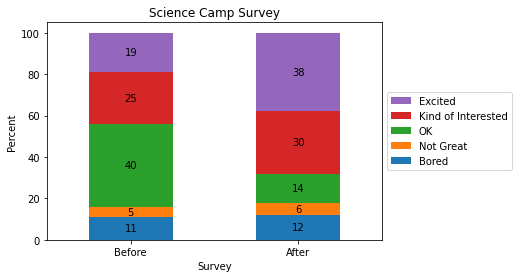

In [7]:
ax = df.plot(kind='bar', stacked=True, rot=0, xlabel='Feeling', ylabel='Percentage', title='Student Interest in Science')
plt.legend(bbox_to_anchor=(1, 0.5), loc=6)

# reverse the legend's order
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1, 0.5), loc=6)

# Print bar labels (matplotlib v3.4.2 needed!)
for c in ax.containers:
  labels = [int(v.get_height()) for v in c]
  ax.bar_label(c, labels=labels, label_type='center')

plt.show()